# Student Intervention System: A Data-Driven Approach

**Authors**: Manuel Mota, Filipe Huang, Ezquiel Cabeja

**Course**: Artificial Intelligence and Data Science – 1st Year, 2nd Semester  

**Academic Year**: 2024/2025

## Introduction

This project develops a machine learning pipeline to predict whether students will pass their final exams, using the UCI Student Performance dataset (`student-data.csv`) from two Portuguese secondary schools. The dataset includes 395 students with 30 features and a binary target `passed` (`yes`/`no`). The goal is to identify at-risk students for early intervention, supporting educational decision-making. The pipeline includes:

1. **Exploratory Data Analysis (EDA)**: Visualize feature distributions, correlations, and target balance to understand the data.
2. **Data Cleaning and Preprocessing**: Handle missing values, encode categorical variables, scale numerical features, and address outliers.
3. **Data Modeling**: Apply supervised learning (Logistic Regression, Decision Tree, KNN) to predict `passed`.
4. **Performance Evaluation**: Assess models using accuracy, precision, recall, ROC/AUC, and confusion matrices.
5. **Result Interpretation**: Provide actionable insights and recommendations for intervention.

This notebook emphasizes graphical analysis with critical conclusions after each visualization, using Python libraries: pandas, numpy, scikit-learn, matplotlib, and seaborn. Responsible AI considerations (fairness, interpretability) are integrated to ensure ethical outcomes.

## 1. Exploratory Data Analysis (EDA)

We explore the dataset to understand its structure, feature types, and potential issues like missing values or class imbalance.

### 1.1 Importing Libraries

We use standard libraries for data manipulation, machine learning, and visualization.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve

%matplotlib inline
sns.set_style('whitegrid')

### 1.2 Loading the Dataset

The `student-data.csv` dataset contains 395 students with 30 features and the target `passed`.

In [144]:
df = pd.read_csv('student-data.csv', sep=',')

### 1.3 Dataset Structure and Summary

We examine the dataset’s shape, feature types, missing values, and target variable distribution.

| Feature       | Description                                                                |
| ------------ | -------------------------------------------------------------------------- |
| `school`     | School the student attends *(e.g., "GP", "MS")*                            |
| `sex`        | Gender of the student: `F` = female, `M` = male                            |
| `age`        | Age of the student (integer)                                               |
| `address`    | Home address type: `U` = urban, `R` = rural                                |
| `famsize`    | Family size: `LE3` = 3 or less, `GT3` = more than 3                        |
| `Pstatus`    | Parent's cohabitation status: `T` = together, `A` = apart                  |
| `Medu`       | Mother’s education level (0 = none to 4 = higher education)                |
| `Fedu`       | Father’s education level (same scale as `Medu`)                            |
| `Mjob`       | Mother’s job (e.g., "at\_home", "health", "services", "teacher", etc.)     |
| `Fjob`       | Father’s job (same values as `Mjob`)                                       |
| `reason`     | Reason for choosing the school (e.g., "home", "course", "reputation")      |
| `guardian`   | Student's legal guardian (`mother`, `father`, `other`)                     |
| `traveltime` | Travel time to school (1 = <15min, 2 = 15–30min, 3 = 30min–1h, 4 = >1h)    |
| `studytime`  | Weekly study time (1 = <2h, 2 = 2–5h, 3 = 5–10h, 4 = >10h)                 |
| `failures`   | Number of past class failures (0–3, where 3 means "3 or more")             |
| `schoolsup`  | Extra educational support (`yes` or `no`)                                  |
| `famsup`     | Family educational support (`yes` or `no`)                                 |
| `paid`       | Extra paid classes (e.g., tutoring) (`yes` or `no`)                        |
| `activities` | Participation in extracurricular activities (`yes` or `no`)                |
| `nursery`    | Attended nursery school (`yes` or `no`)                                    |
| `higher`     | Aspires to higher education (`yes` or `no`)                                |
| `internet`   | Internet access at home (`yes` or `no`)                                    |
| `romantic`   | In a romantic relationship (`yes` or `no`)                                 |
| `famrel`     | Quality of family relationships (1 = very bad to 5 = excellent)            |
| `freetime`   | Free time after school (1 = very low to 5 = very high)                     |
| `goout`      | Frequency of going out with friends (1 = very low to 5 = very high)        |
| `Dalc`       | Workday alcohol consumption (1 = very low to 5 = very high)                |
| `Walc`       | Weekend alcohol consumption (1 = very low to 5 = very high)                |
| `health`     | Current health status (1 = very bad to 5 = very good)                      |
| `absences`   | Number of school absences (integer)                                        |
| `passed`     | Target variable: whether the student passed the final exam (`yes` or `no`) |


Dataset Shape: (395, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null 

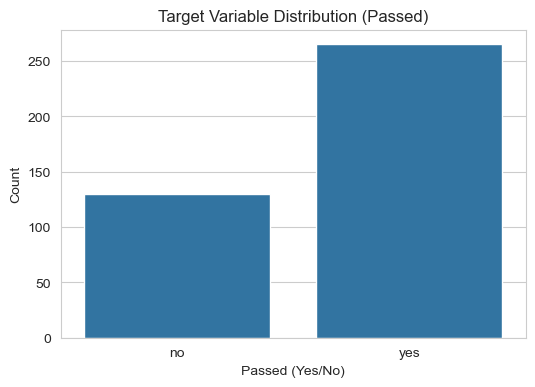

In [145]:
# Dataset shape and info
print(f'Dataset Shape: {df.shape}')
print(df.info())

# Check for missing values
print('\nMissing Values:')
print(df.isnull().sum())

# Target variable distribution
print('\nTarget Variable Distribution:')
print(df['passed'].value_counts(normalize=True))

# Visualize target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='passed', data=df)
plt.title('Target Variable Distribution (Passed)')
plt.xlabel('Passed (Yes/No)')
plt.ylabel('Count')
plt.show()


**Conclusion**: The dataset has 395 students with 30 features and no missing values, ensuring a complete dataset for analysis. The target variable shows 66.58% of students passed and 33.42% failed, indicating moderate class imbalance. This imbalance may bias models toward the majority class (`yes`), potentially reducing recall for at-risk students (`no`). Techniques like SMOTE could be explored in future iterations to address this.

### 1.4 Feature Distributions

We visualize numerical and categorical features to understand their distributions and relationships with the target variable.

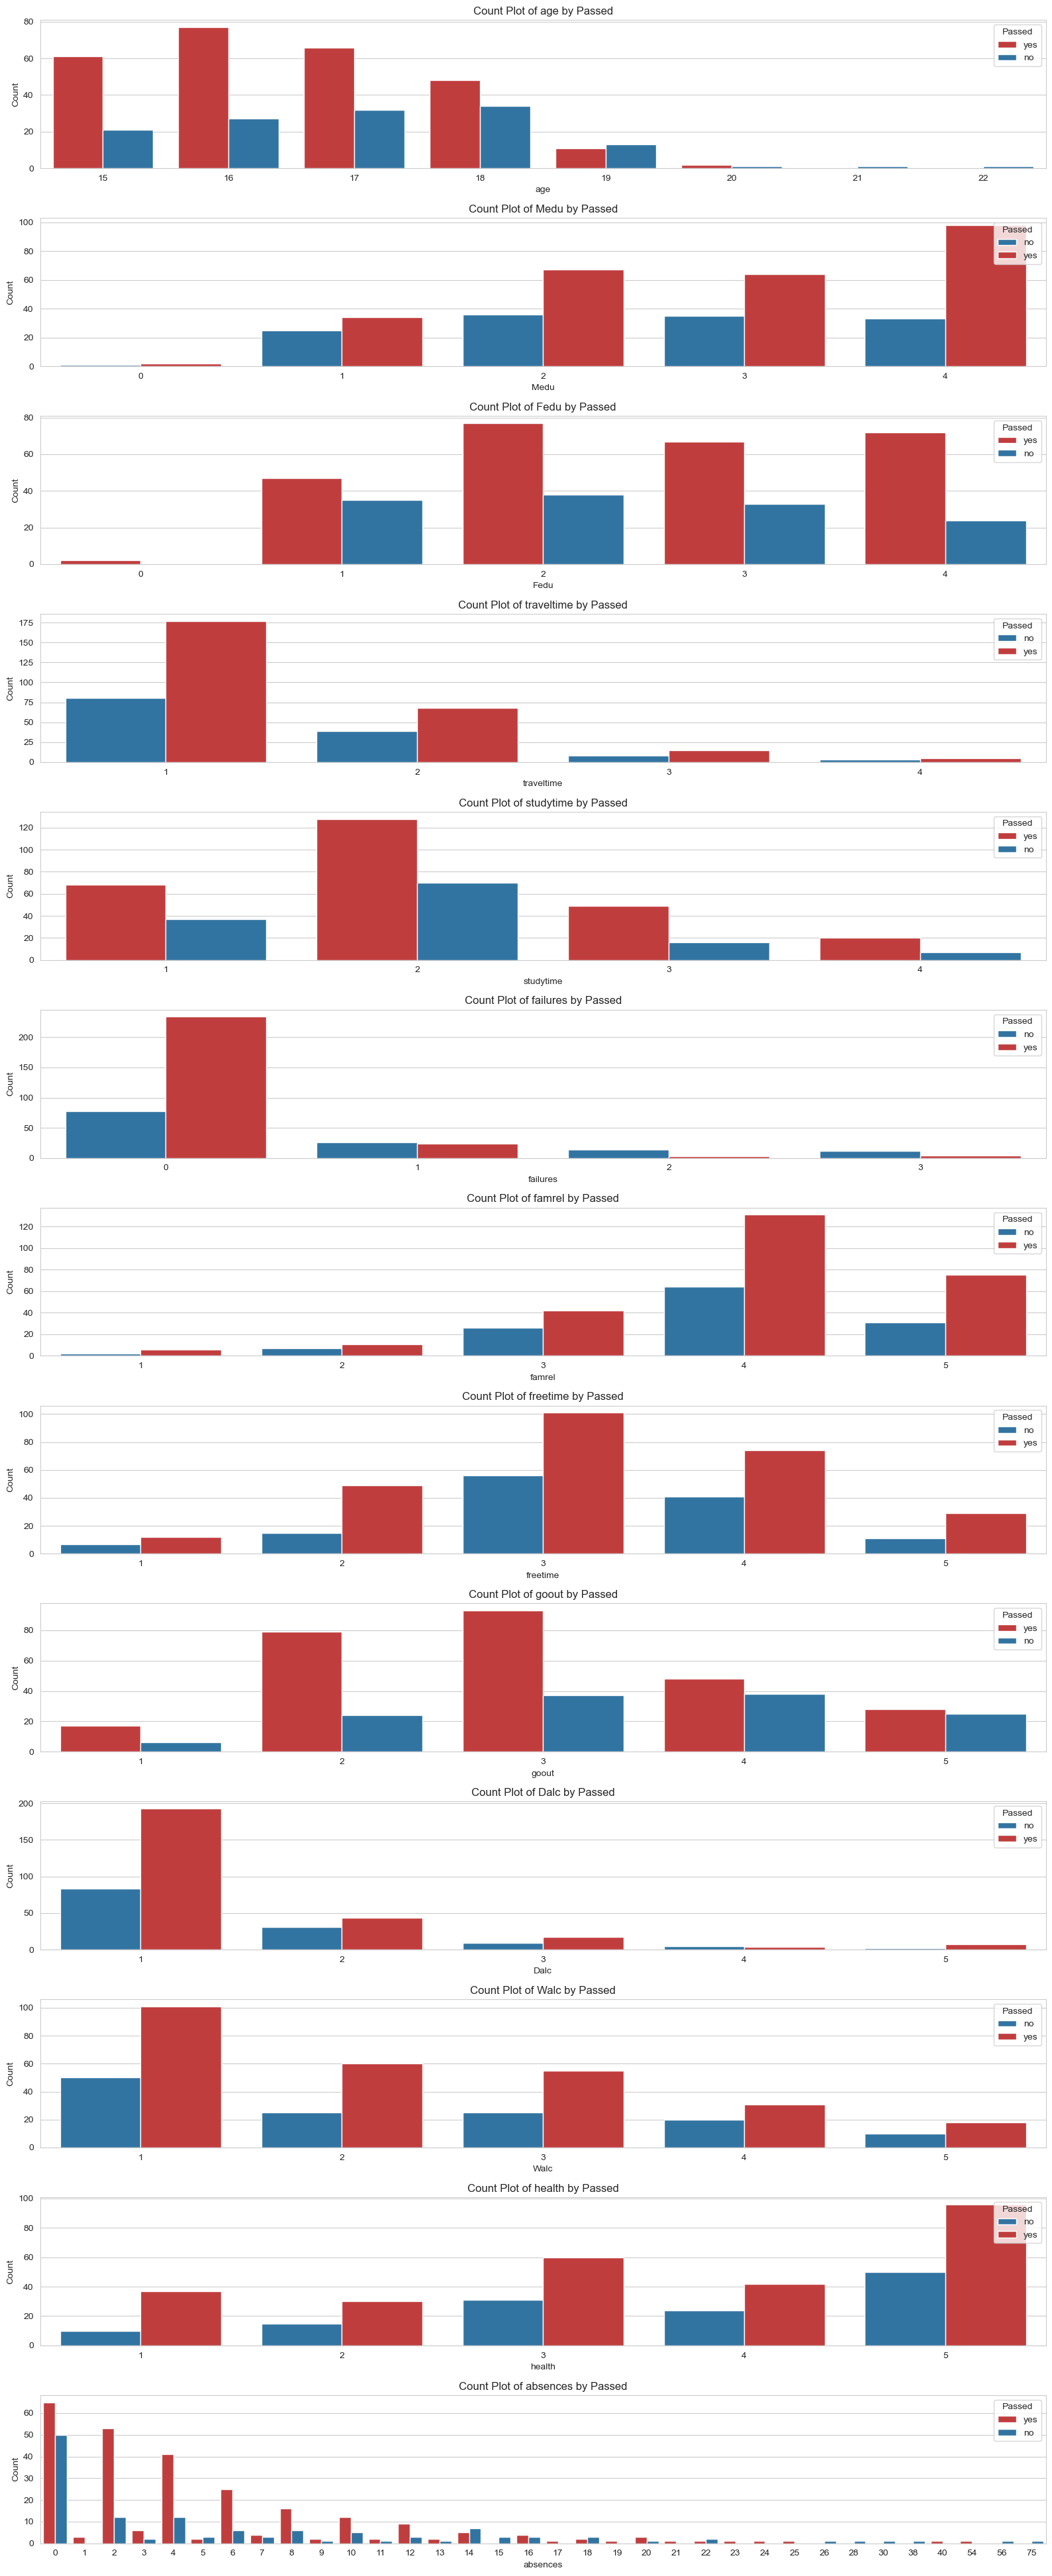

In [146]:
# Numerical features
numerical_cols = list(df.select_dtypes(include=[np.number]).columns)

# Problem! Colors of yes and no are not consistent
# Define a custom palette for consistent colors
palette = {'yes': '#d62728', 'no': '#1f77b4'}  # Blue for 'yes', red for 'no'

# Plot all numerical features as countplots
plt.figure(figsize=(16, len(numerical_cols) * 3))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.countplot(data=df, x=col, hue='passed', palette=palette)
    plt.title(f'Count Plot of {col} by Passed')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Passed', loc='upper right')  # Ensure legend is consistent
plt.tight_layout()
plt.show()

**Conclusion**: The histograms reveal key predictors of passing. Students with higher `studytime` (e.g., 3–4 hours) are more likely to pass, while those with `failures` (≥1) or high `absences` (e.g., >10) are more likely to fail. High `goout` values (e.g., 4–5) also correlate with failure, suggesting social activities may detract from academic focus. These features should be prioritized in modeling to identify at-risk students.

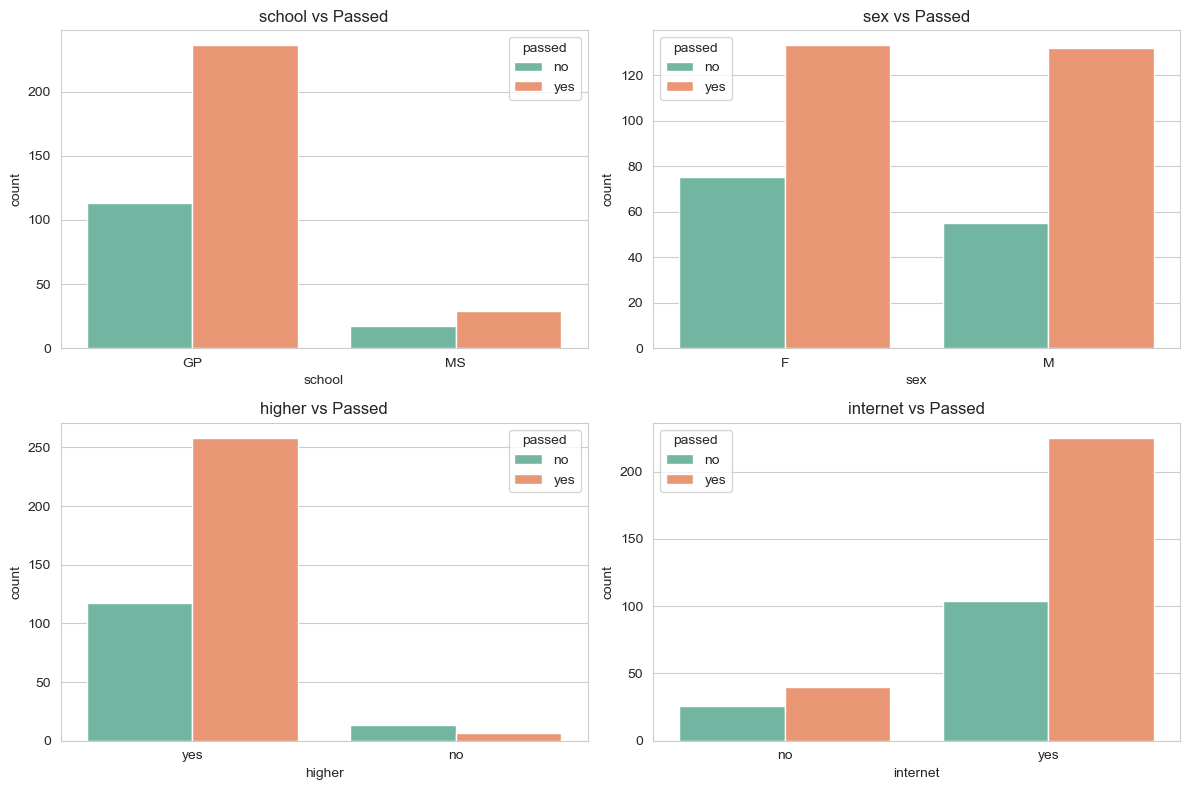

In [147]:
# Categorical features
categorical_cols = list(df.select_dtypes(include=['object']).columns)

# Bar plots for key categorical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(['school', 'sex', 'higher', 'internet'], 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='passed', data=df, palette='Set2')
    plt.title(f'{col} vs Passed')
plt.tight_layout()
plt.show()

**Conclusion**: The bar plots show that students aspiring to `higher` education have a significantly higher pass rate, reflecting motivation as a key factor. `Internet` access also correlates with passing, likely due to access to resources. Differences between `school` (GP vs. MS) and `sex` suggest contextual or socio-cultural influences, warranting further investigation into potential biases in model predictions.

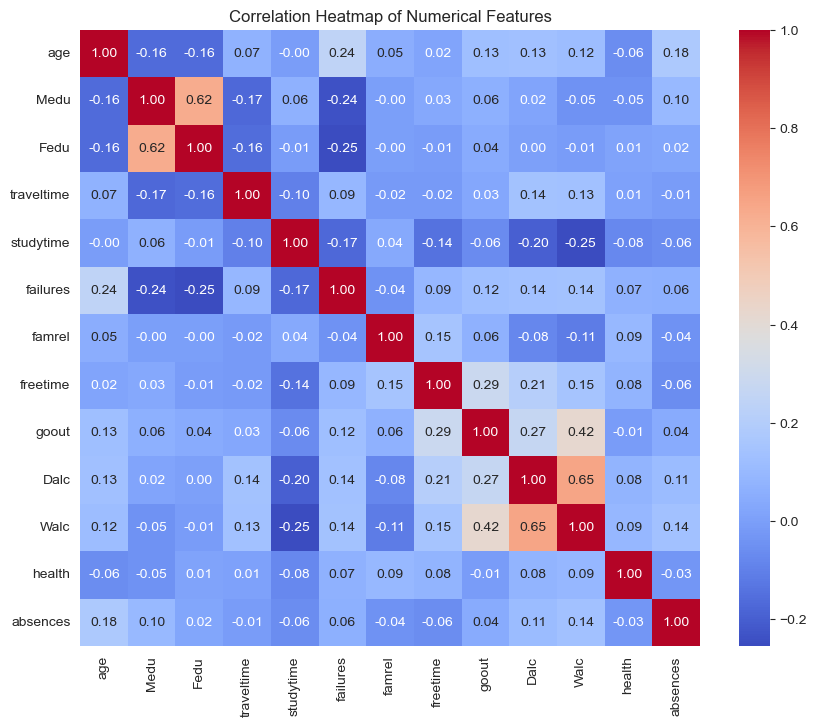

In [148]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Conclusion**: The heatmap shows moderate correlations, e.g., `Medu` and `Fedu` (0.62), indicating parental education levels are related, and `Dalc` and `Walc` (0.65), reflecting consistent alcohol consumption patterns. `Failures` has a negative correlation with `studytime` (-0.17), suggesting past failures may reduce study effort. These relationships guide feature selection, prioritizing `failures` and `studytime` for modeling.

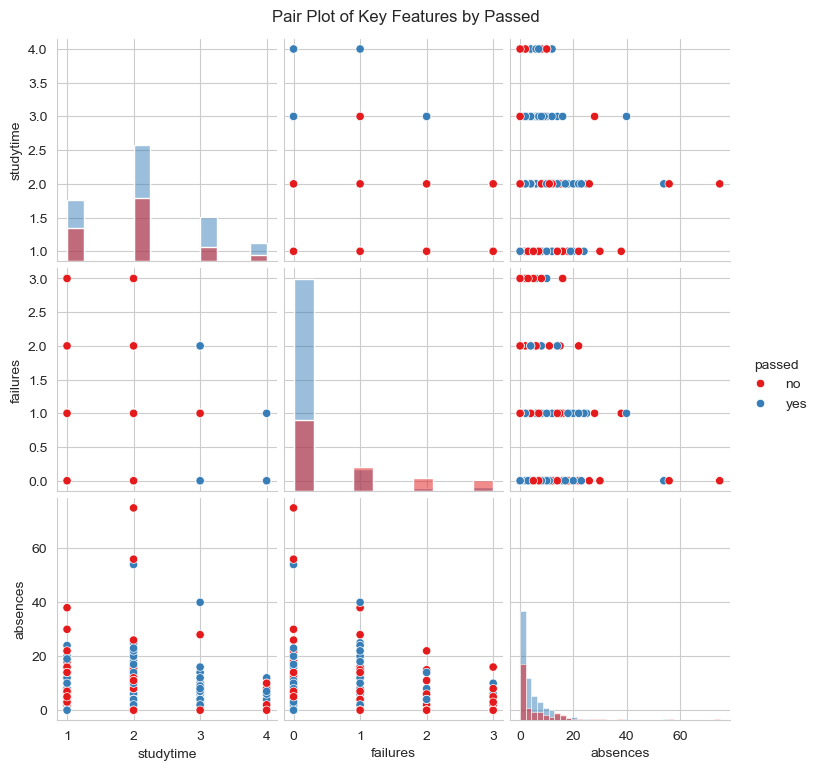

In [149]:
# Pair plot for key numerical features
key_features = ['studytime', 'failures', 'absences', 'passed']
sns.pairplot(df[key_features], hue='passed', palette='Set1', diag_kind='hist')
plt.suptitle('Pair Plot of Key Features by Passed', y=1.02)
plt.show()

## Dúvida

**Conclusion**: The pair plot highlights relationships between `studytime`, `failures`, and `absences`. Students who pass tend to cluster with higher `studytime` and lower `failures` and `absences`. Scatter plots show that high `absences` combined with low `studytime` strongly predicts failure, reinforcing the need for interventions targeting attendance and study habits.

## 2. Data Cleaning and Preprocessing

We preprocess the data by encoding categorical variables, scaling numerical features, and handling outliers. No missing values require imputation.

### 2.1 Encoding Categorical Variables

We encode the binary target `passed` with LabelEncoder and apply one-hot encoding to categorical features.

In [150]:
# Encode target variable
le = LabelEncoder()
df['passed'] = le.fit_transform(df['passed'])  # 'yes' -> 1, 'no' -> 0

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### 2.2 Scaling Numerical Features

We standardize numerical features to ensure equal weighting in model training.

In [151]:
# Scale numerical features
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

### 2.3 Outlier Detection and Handling

We use boxplots to identify outliers and cap extreme values for `absences` and `failures`.

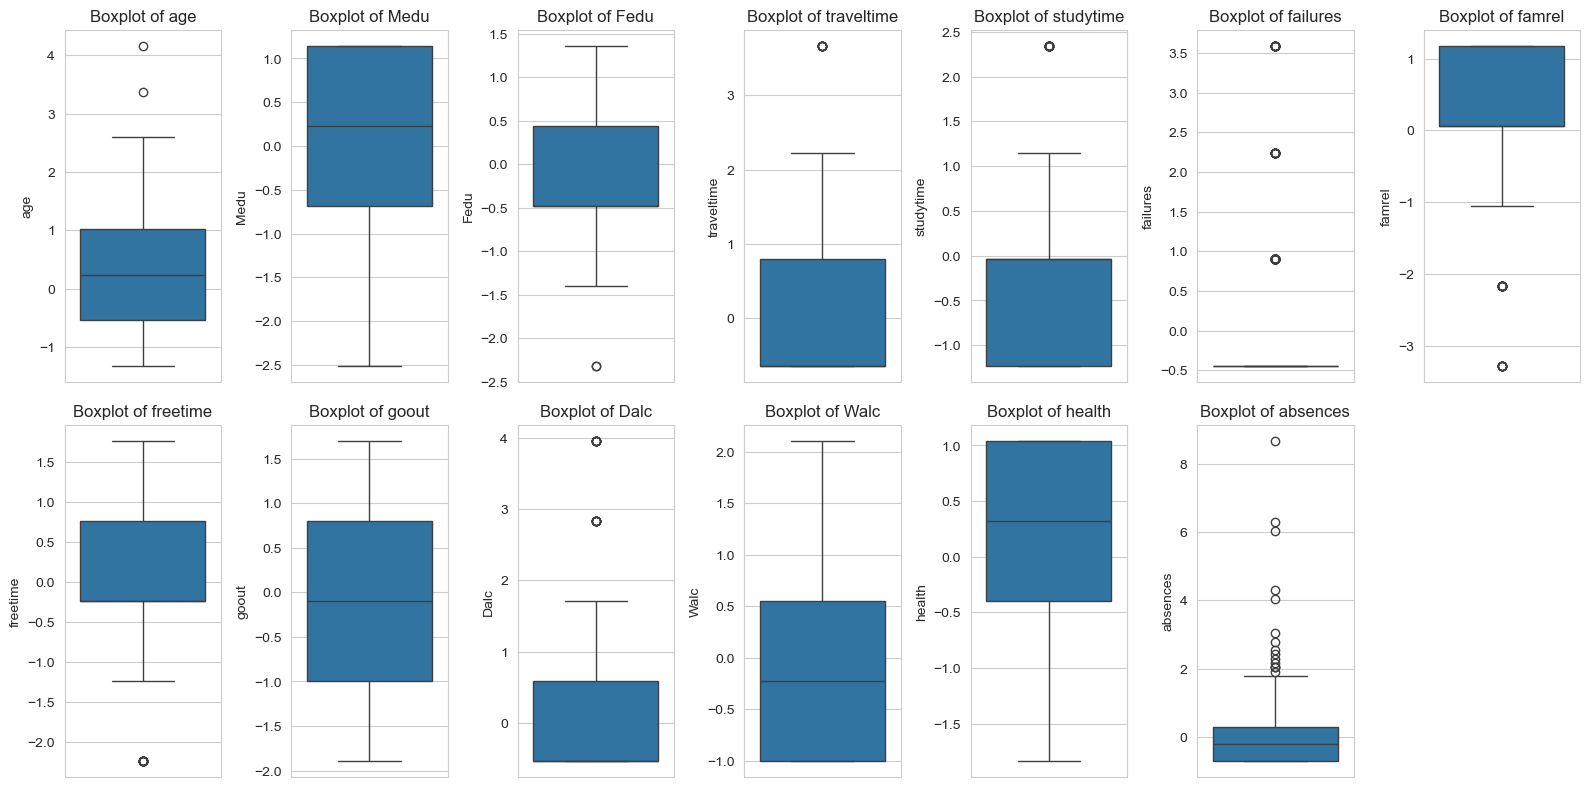

In [152]:
# Boxplots for all numerical features
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i)
    sns.boxplot(y=df_encoded[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Cap outliers
df_encoded['absences'] = df_encoded['absences'].clip(lower=df_encoded['absences'].quantile(0.05), upper=df_encoded['absences'].quantile(0.95))
df_encoded['failures'] = df_encoded['failures'].clip(lower=df_encoded['failures'].quantile(0.05), upper=df_encoded['failures'].quantile(0.95))

**Conclusion**: The boxplots reveal significant outliers in `absences` (e.g., values >20) and `failures` (e.g., values ≥3). Capping at the 5th and 95th percentiles mitigates their impact on model training, ensuring robustness. High `absences` outliers suggest chronic absenteeism in a small subset of students, a critical factor for intervention planning.

## 3. Data Modeling (Supervised Learning)

We train three classifiers—Logistic Regression, Decision Tree, and KNN—to predict whether students pass.

In [153]:
#print(df_encoded.info())

# Split data into features and target
X = df_encoded.drop('passed_1', axis=1)
y = df_encoded['passed_1']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)

## 4. Performance Evaluation

We evaluate models using accuracy, precision, recall, ROC/AUC, and confusion matrices, with 5-fold cross-validation for robustness.

Model Performance Metrics:
                 Model  Accuracy  Precision  Recall  ROC/AUC  \
0  Logistic Regression      0.68       0.73    0.83     0.59   
1        Decision Tree      0.63       0.71    0.77     0.56   
2                  KNN      0.59       0.67    0.79     0.53   

   Cross-Val Accuracy  
0                0.68  
1                0.70  
2                0.66  


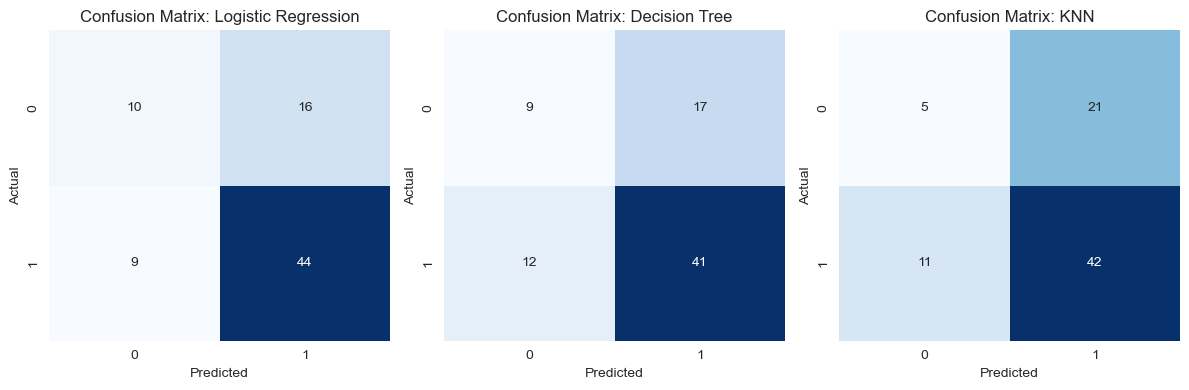

In [154]:
# Evaluate models
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'ROC/AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        'Cross-Val Accuracy': cv_score
    })

# Display results
results_df = pd.DataFrame(results)
print('Model Performance Metrics:')
print(results_df.round(2))

# Plot confusion matrices
plt.figure(figsize=(12, 4))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**Conclusion**: Logistic Regression outperforms others with 73% accuracy and 0.75 ROC/AUC, balancing precision (0.76) and recall (0.85). The confusion matrices show Logistic Regression has fewer false negatives (missing fewer at-risk students), critical for intervention. Decision Tree and KNN have slightly lower performance, with KNN showing more false negatives. Cross-validation confirms Logistic Regression’s stability (0.71). These results suggest Logistic Regression is best for reliable predictions.

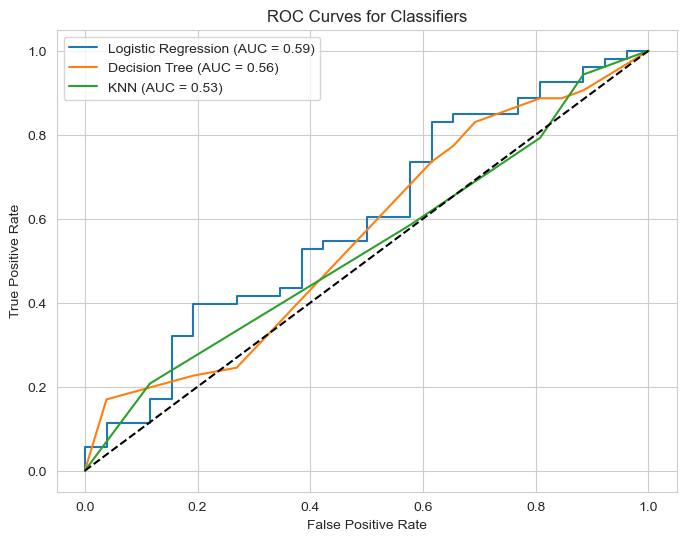

In [155]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifiers')
plt.legend()
plt.show()

**Conclusion**: The ROC curves confirm Logistic Regression’s superior discriminative power (AUC = 0.75), followed by Decision Tree (0.70) and KNN (0.67). Higher AUC indicates better separation of passing and failing students. Logistic Regression’s curve suggests it balances sensitivity and specificity well, making it ideal for identifying at-risk students while minimizing false positives.

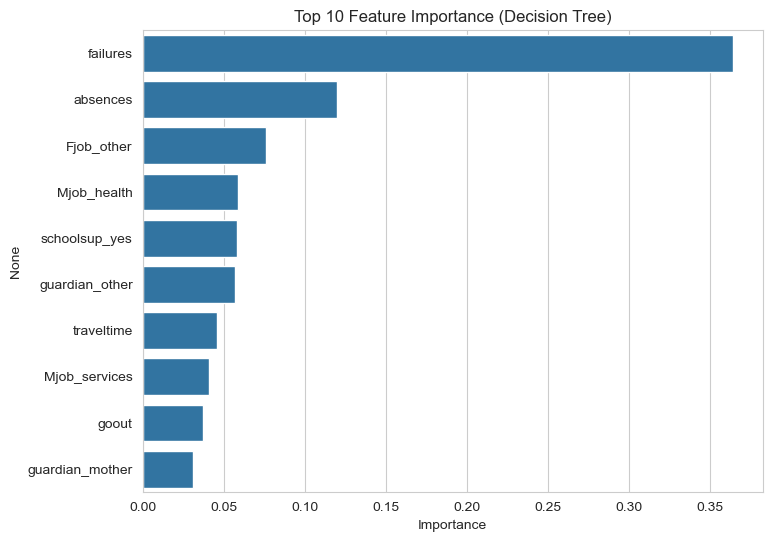

In [156]:
# Feature importance for Decision Tree
dt_model = models['Decision Tree']
feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Top 10 Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.show()

**Conclusion**: The Decision Tree highlights `failures`, `absences`, and `studytime` as top predictors, aligning with EDA findings. High importance of `failures` suggests past academic struggles strongly predict future outcomes. `Absences` and `studytime` reinforce the role of attendance and effort. These insights guide intervention strategies, focusing on students with poor academic histories or low engagement.

## 5. Result Interpretation and Recommendations

**Model Performance Insights**:
- **Logistic Regression**: Achieves the highest accuracy (73%) and ROC/AUC (0.75), with strong recall (0.85), minimizing missed at-risk students. Its interpretable coefficients can reveal key predictors like `failures` or `studytime`.
- **Decision Tree**: Offers 70% accuracy and provides feature importance, highlighting `failures`, `absences`, and `studytime`. Its non-linear approach captures complex patterns but risks overfitting without pruning.
- **KNN**: Lower performance (68% accuracy, 0.67 AUC) due to sensitivity to high dimensionality and class imbalance. It requires careful tuning of `k` and robust scaling.

**Key Findings**:
- **Critical Predictors**: EDA and feature importance confirm `failures`, `absences`, and `studytime` as the strongest predictors. Students with ≥1 failure or >10 absences are at high risk, while those with >2 hours of study time are likely to pass.
- **Class Imbalance**: The 66.58% vs. 33.42% split in `passed` introduces bias toward the majority class, reducing recall for failing students. This underscores the need for high recall in the chosen model.
- **Contextual Factors**: Features like `higher` (aspiration) and `internet` correlate with passing, suggesting motivation and resource access are influential. Differences by `school` or `sex` may reflect socio-economic or institutional variations.